In [1]:
from functools import partial

from transformers import CLIPVisionModel 
import torch
from torch import nn
from torchvision import transforms
from PIL import Image
import os
proxy = 'http://127.0.0.1:7890'
os.environ['http_proxy'] = proxy
os.environ['https_proxy'] = proxy
# import subprocess
# import os

# result = subprocess.run('bash -c "source /etc/network_turbo && env | grep proxy"', shell=True, capture_output=True, text=True)
# output = result.stdout
# for line in output.splitlines():
#     if '=' in line:
#         var, value = line.split('=', 1)
#         os.environ[var] = value
import torch
import torch.nn as nn
from transformers import CLIPVisionModel
from torchvision import transforms
import sys
sys.path.append("../")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
import transformers
print(transformers.__version__)


4.44.2


In [3]:
from transformers import CLIPVisionModelWithProjection, CLIPImageProcessor


In [4]:
class CLIPEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        # self.clip = CLIPVisionModel.from_pretrained('openai/clip-vit-large-patch14').to(torch.bfloat16)
        # self.clip_size = (224, 224)

        self.preprocess = CLIPImageProcessor(
            size={"height": 512, "width": 512},
            crop_size={"height": 512, "width": 512},
        )


        # for param in self.clip.parameters():
        #     param.requires_grad = False
        self.image_encoder = CLIPVisionModelWithProjection.from_pretrained(
        "h94/IP-Adapter", 
        # "laion2b_s32b_b79k",
        subfolder="models/image_encoder",
        torch_dtype=torch.float16,
        ).to("cuda")
        
        
    
def encode_image(image, image_encoder, feature_extractor, num_images_per_prompt=1, device='cuda'):
    dtype = next(image_encoder.parameters()).dtype

    if not isinstance(image, torch.Tensor):
        image = feature_extractor(image, return_tensors="pt").pixel_values # [1, 3, 224, 224]
        print("image", image.shape)
    image = image.to(device=device, dtype=dtype)
    image_embeds = image_encoder(image).image_embeds # (1, 1024)
    image_embeds = image_embeds.repeat_interleave(num_images_per_prompt, dim=0) # (num_images_per_prompt, 1024)

    return image_embeds

In [5]:
# example_image_path = "/root/autodl-tmp/Workspace/EEG_caption/docs/test/alpaca_03s.jpg"
clip_encoder = CLIPEncoder().to(device)

# from diffusers.utils import load_image
# image_prompt = load_image(example_image_path)
# display(image_prompt)


In [6]:
# image = Image.open(example_image_path).convert("RGB")
# image_embeds = encode_image(image_prompt, clip_encoder.image_encoder, clip_encoder.preprocess, 1, device)
# image_embeds.shape

In [7]:
import torch
# torch.save(image_embeds, 'image_embeds.pt')
image_embeds_1 = torch.load('/root/autodl-tmp/BrainAligning/ViT-H-14_features_test.pt', map_location=device)['img_features'].unsqueeze(1)

/tmp/ipykernel_206374/3854250370.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  image_embeds_1 = torch.load('/root/autodl-tmp/BrainAligning/ViT-H-14_features_test.pt', 

In [8]:
image_embeds_1.shape

torch.Size([200, 1, 1024])

In [10]:
eeg_embeds_1 = torch.load('/root/autodl-tmp/BrainAligning/ATM_S_eeg_features_sub-08_test.pt', map_location=device).unsqueeze(1)


/tmp/ipykernel_206374/1040013493.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  eeg_embeds_1 = torch.load('/root/autodl-tmp/BrainAligning/ATM_S_eeg_features_sub-08_test

In [11]:
eeg_embeds_1.shape

torch.Size([200, 1, 1024])

In [12]:
# img_feature = img_feature.mean(dim=1).squeeze(0)
# img_feature = img_feature.unsqueeze(0)
# img_feature.shape

In [13]:
# open_clip_img_feature = torch.load('ViT-H-14_features_test.pt', map_location=device)['img_features'].unsqueeze(1)
# open_clip_img_feature[0].shape

In [14]:
# open_clip_img_feature[0].std()

In [15]:
# import torch
# image_features_test = torch.load("/home/ldy/Workspace/EEG_caption/ViT-H-14_features_test.pt")
# image_features_test['img_features'].shape

In [16]:
# image_features_test['img_features'][0].unsqueeze(0).shape

In [17]:
# import torch
# image_features_test = torch.load("/home/ldy/Workspace/BrainAligning/ViT-L-14_features_multimodal_test.pt")
# image_features_test['img_features'].shape

In [18]:

import torch
from torch import nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
# import open_clip
from matplotlib.font_manager import FontProperties


from diffusion_prior import *
from custom_pipeline_low_level import *
# from custom_pipeline import *
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [19]:
image_embeds_1.shape

torch.Size([200, 1, 1024])

In [20]:
image_embeds_1[0].shape

torch.Size([1, 1024])

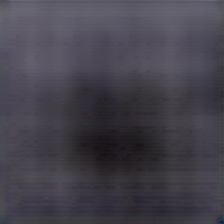

torch.Size([1, 3, 512, 512])

In [21]:
from PIL import Image
low_level_img_path = '/root/autodl-tmp/BrainAligning/low_level_vae_imgs/epoch_36/reconstructed_image_0.png'
# Provides low-level images 
low_level_image = Image.open(low_level_img_path)
low_level_image.show()
low_level_image = clip_encoder.preprocess(low_level_image, return_tensors="pt").pixel_values # [1, 3, 224, 224]
low_level_image.shape

In [22]:
from diffusers.image_processor import VaeImageProcessor
image_processor = VaeImageProcessor()
from diffusers import AutoencoderKL
# path = "stabilityai/sdxl-turbo"
# vlmodel = AutoencoderKL.from_pretrained(
#     path, subfolder='vae').to(device)

pipe = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float, variant="fp16")
vlmodel = pipe.vae

posterior = vlmodel.encode(low_level_image).latent_dist
image_latent = posterior.mode()
print("image_latent.shape", image_latent.shape)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

image_latent.shape torch.Size([1, 4, 64, 64])


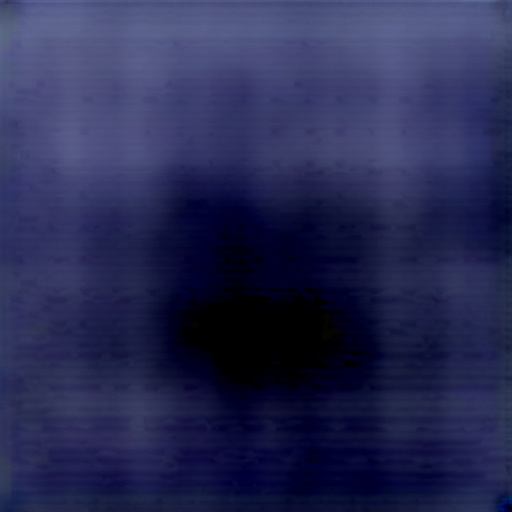

In [23]:
with torch.no_grad():
    x_rec = vlmodel.decode(image_latent).sample
    image_rec = image_processor.postprocess(x_rec, output_type='pil')
    image_rec[0].show()

In [24]:
# from IPython.display import Image, display
# # latents torch.Size([1, 4, 64, 64])
# generator = Generator4Embeds(num_inference_steps=4, device=device)
# set a seed value
# seed_value = 42
# gen = torch.Generator(device=device)
# gen.manual_seed(seed_value)
# image = generator.generate(image_embeds_1[0], generator=gen)  
# display(image)


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/4 [00:00<?, ?it/s]

/root/miniconda3/envs/umbrae/lib/python3.10/site-packages/diffusers/models/embeddings.py:1692: FutureWarning: You have passed a tensor as `image_embeds`.This is deprecated and will be removed in a future release. Please make sure to update your script to pass `image_embeds` as a list of tensors to suppress this warning.
  deprecate("image_embeds not a list", "1.0.0", deprecation_message, standard_warn=False)


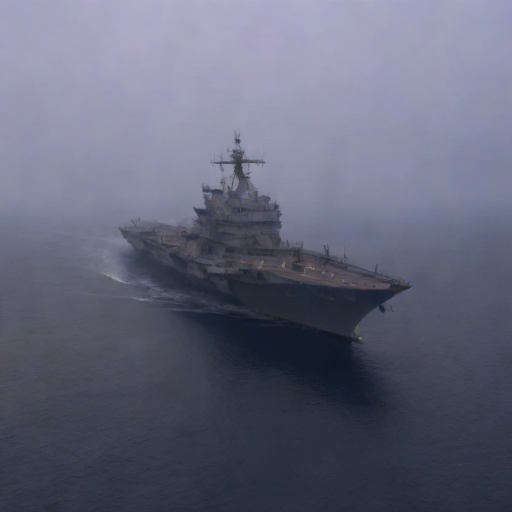

In [25]:
from IPython.display import Image, display

generator = Generator4Embeds(num_inference_steps=4, device=device, img2img_strength=0.75, low_level_image=low_level_image, low_level_latent=None)
# set a seed value
seed_value = 30
gen = torch.Generator(device=device)
gen.manual_seed(seed_value)
image = generator.generate(image_embeds_1[0], generator=gen)
display(image)

In [26]:

# seed_value = 42
# gen = torch.Generator(device=device)
# gen.manual_seed(seed_value)
# image = generator.generate(img_feature, generator=gen)
# display(image)

In [27]:
import os
from PIL import Image
import torch
from IPython.display import display

# Assume there's a class Generator4Embeds and a clip_encoder preprocessing method
# You can modify these classes and methods based on your existing code

# Original image directory and output image directory
input_dir = '/root/autodl-tmp/BrainAligning/vae_imgs/epoch_40'
output_dir = '/root/autodl-tmp/BrainAligning/reconstructed_imgs'

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Set seed value
seed_value = 42
gen = torch.Generator(device=device)
gen.manual_seed(seed_value)

# Modify sorting function to extract the number after the first "_"
def extract_number(file_name):
    # Assume the file name format is "reconstructed_image_0_2.png"
    return int(file_name.split('_')[2])  # Extract the number after the first "_"

# Iterate through all image files in the directory and sort them by the number after the first "_"
for i, file_name in enumerate(sorted(os.listdir(input_dir), key=extract_number)):
    if i % 80 == 0:
        print(file_name)            
        if file_name.endswith(".png"):  # Only process PNG images
            img_path = os.path.join(input_dir, file_name)
            
            # Open and preprocess the image
            low_level_image = Image.open(img_path)
            # low_level_image.show()
            low_level_image = clip_encoder.preprocess(low_level_image, return_tensors="pt").pixel_values  # [1, 3, 224, 224]
            
            # Create an instance of the generator
            generator = Generator4Embeds(num_inference_steps=5, device=device, img2img_strength=0.8, low_level_image=low_level_image)
            
            # Generate the reconstructed image
            reconstructed_image = generator.generate(eeg_embeds_1[i // 80], text_prompt ="", generator=gen)
            
            # Save the reconstructed image to the new directory
            output_path = os.path.join(output_dir, file_name)
            reconstructed_image.save(output_path)
            
            # Optionally display the generated image
            # display(reconstructed_image)

print("All images have been successfully reconstructed and saved to:", output_dir)


reconstructed_image_0_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_1_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_2_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_3_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_4_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_5_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_6_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_7_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_8_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_9_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_10_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_11_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_12_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_13_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_14_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_15_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_16_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_17_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_18_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_19_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_20_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_21_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_22_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_23_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_24_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_25_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_26_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_27_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_28_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_29_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_30_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_31_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_32_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_33_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_34_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_35_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_36_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_37_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_38_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_39_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_40_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_41_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_42_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_43_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_44_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_45_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_46_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_47_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_48_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_49_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_50_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_51_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_52_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_53_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_54_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_55_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_56_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_57_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_58_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_59_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_60_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_61_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_62_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_63_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_64_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_65_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_66_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_67_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_68_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_69_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_70_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_71_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_72_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_73_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_74_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_75_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_76_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_77_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_78_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_79_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_80_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_81_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_82_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_83_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_84_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_85_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_86_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_87_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_88_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_89_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_90_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_91_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_92_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_93_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_94_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_95_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_96_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_97_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_98_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_99_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_100_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_101_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_102_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_103_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_104_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_105_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_106_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_107_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_108_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_109_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_110_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_111_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_112_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_113_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_114_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_115_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_116_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_117_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_118_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_119_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_120_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_121_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_122_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_123_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_124_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_125_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_126_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_127_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_128_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_129_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_130_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_131_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_132_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_133_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_134_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_135_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_136_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_137_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_138_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_139_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_140_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_141_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_142_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_143_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_144_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_145_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_146_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_147_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_148_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_149_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_150_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_151_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_152_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_153_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_154_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_155_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_156_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_157_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_158_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_159_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_160_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_161_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_162_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_163_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_164_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_165_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_166_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_167_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_168_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_169_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_170_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_171_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_172_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_173_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_174_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_175_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_176_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_177_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_178_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_179_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_180_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_181_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_182_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_183_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_184_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_185_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_186_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_187_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_188_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_189_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_190_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_191_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_192_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_193_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_194_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_195_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_196_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_197_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_198_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

reconstructed_image_199_0.png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/10 [00:00<?, ?it/s]

所有图像已成功重建并保存到: /root/autodl-tmp/BrainAligning/reconstructed_imgs
